# Релизуйте свой классификатор KNN

### Импорты

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. (3 балла) Реализован класс с параметрами по умолчанию
2. (1 балл) Реализовано манхетенское расстояние `(metric='manhattan')`
3. (2 балла) Реализованы веса, зависящие от растояния `(weights='distance')`



In [2]:
class MyKNeighborsClassifier:
  def __init__(self, n_neighbours: int = 5, weights: str = "uniform", metric: str = "euclidean"):
    if metric not in ["manhattan", "euclidean"]:
      raise ValueError("This type of metric is not supported: {}".format(metric))
    if weights not in ["uniform", "distance"]:
      raise ValueError("This type of weights is not supported: {}".format(weights))
    
    self.n_neighbours = n_neighbours
    self.weights = weights
    self.metric = metric

    self.X_train = None
    self.y_train  = None


  def euclidean_distant(self, Point_1, Point_2) -> float:
    return ((Point_1[0]-Point_2[0])**2 + (Point_1[1]-Point_2[1])**2)**0.5

  def manhattan_distant(self, Point_1, Point_2) -> float:
    return abs(Point_1[0]-Point_2[0]) + abs(Point_1[1]-Point_2[1])


  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    self.X_train = X
    self.y_train = y

  def predict(self, X: np.ndarray) -> np.ndarray:
    if self.weights == "uniform":
      y = []
      for Point_i in X:
        dist = []
        for Point_j in self.X_train:
          if self.metric == "euclidean":
            dist.append(self.euclidean_distant(Point_i, Point_j))
          elif self.metric == "manhattan":
            dist.append(self.manhattan_distant(Point_i, Point_j))

        data = []
        
        for k in range(self.n_neighbours):
          ind_min = 0
          dist_min = dist[ind_min]
          for i in range(len(dist)):
            if dist[i] < dist_min:
              dist_min = dist[i]
              ind_min = i
          data.append(self.y_train[ind_min])
          dist[ind_min] = 1000
        
        flag_0 = 0
        flag_1 = 0
        for i in range(self.n_neighbours):
          if data[i] == 0:
            flag_0 += 1
          elif data[i] == 1:
            flag_1 += 1
        
        if flag_0 >= flag_1:
          y.append(0)
        else:
          y.append(1)

      return(np.array(y))

    elif self.weights == "distance":
      y = []
      for Point_i in X:
        dist = []
        for Point_j in self.X_train:
          if self.metric == "euclidean":
            dist.append(self.euclidean_distant(Point_i, Point_j))
          elif self.metric == "manhattan":
            dist.append(self.manhattan_distant(Point_i, Point_j))
        
        data = []
        
        for k in range(self.n_neighbours):
          ind_min = 0
          dist_min = dist[ind_min]
          for i in range(len(dist)):
            if dist[i] < dist_min:
              dist_min = dist[i]
              ind_min = i
          data.append([self.y_train[ind_min],dist_min])
          dist[ind_min] = 1000

        flag_0 = 0
        flag_1 = 0
        for i in range(self.n_neighbours):
          if data[i][0] == 0:
            flag_0 += 1 / data[i][1]
          elif data[i][0] == 1:
            flag_1 += 1 / data[i][1]
        
        if flag_0 > flag_1:
          y.append(0)
        else:
          y.append(1)

      return(np.array(y))
      


### Проверьте решение на датасете и сравните с kNeighborsClassifier из sklearn (4 балла)
1. (1 балл) Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)
  1. Параметры по умолчанию
  2. `weights='distance'`
  3. `metric='manhattan'`
  4. `weights='distance'`, `metric='manhattan'`
2. (2 балла) Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)
  1. Переберите параметр, каждый раз обучайте модель
  2. Выведите график зависимости `accuracy` от `k`
  3. На этом же графике выведите пунктирной линией такую же зависимость для модели из sklearn
3. (3 балла) Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



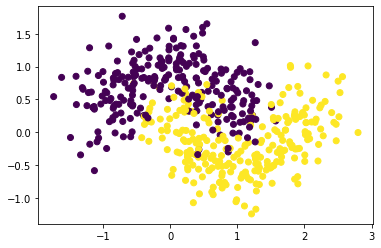

In [3]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

0.9133333333333333


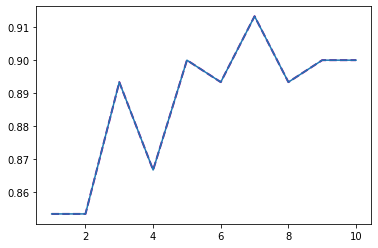

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
data_1 = []
data_2 = []
absciss = [i+1 for i in range(10)]

for k in range(1,11):
  myknn = MyKNeighborsClassifier(n_neighbours=k)
  myknn.fit(X_train, y_train)
  my_pred = myknn.predict(X_test)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  data_1.append(accuracy_score(y_test, y_pred))
  data_2.append(accuracy_score(y_test, my_pred))

print(max(data_2))

plt.plot(absciss,data_1,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.plot(absciss,data_2)



0.9066666666666666


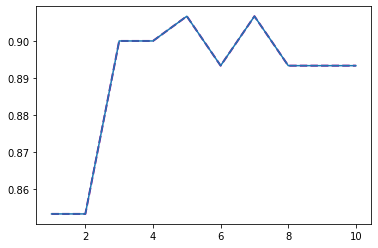

In [5]:
data_1 = []
data_2 = []

for k in range(1,11):
  myknn = MyKNeighborsClassifier(n_neighbours=k, weights="distance")
  myknn.fit(X_train, y_train)
  my_pred = myknn.predict(X_test)

  knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  data_1.append(accuracy_score(y_test, y_pred))
  data_2.append(accuracy_score(y_test, my_pred))

print(max(data_2))

plt.plot(absciss,data_1,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.plot(absciss,data_2)

0.9066666666666666


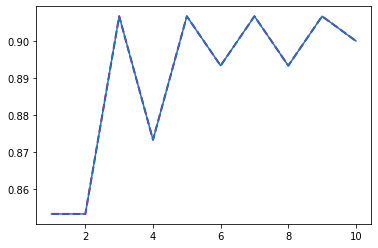

In [6]:
data_1 = []
data_2 = []

for k in range(1,11):
  myknn = MyKNeighborsClassifier(n_neighbours=k, metric="manhattan")
  myknn.fit(X_train, y_train)
  my_pred = myknn.predict(X_test)

  knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  data_1.append(accuracy_score(y_test, y_pred))
  data_2.append(accuracy_score(y_test, my_pred))

print(max(data_2))

plt.plot(absciss,data_1,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.plot(absciss,data_2)

0.9066666666666666


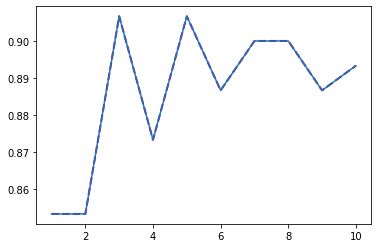

In [7]:
data_1 = []
data_2 = []

for k in range(1,11):
  myknn = MyKNeighborsClassifier(n_neighbours=k, weights="distance", metric="manhattan")
  myknn.fit(X_train, y_train)
  my_pred = myknn.predict(X_test)

  knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="manhattan")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  data_1.append(accuracy_score(y_test, y_pred))
  data_2.append(accuracy_score(y_test, my_pred))

print(max(data_2))

plt.plot(absciss,data_1,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')
plt.plot(absciss,data_2)

Выводы: моя реализация knn полностью совпала по эффективности с результатами работы kNeighborsClassifier из sklearn. Для каждого из случаем выпишем наилучшие (в смысле значений accuracy_score) значения параметра k:

1. `Параметры по умолчанию; k = 7`

2. `weights='distance'; k = {5, 7}`

3. `metric='manhattan' k = {3, 5, 7, 9}`

4. `weights='distance', metric='manhattan'; k = {3, 5}`

Заметим, что все значения k - нечетные, что не удивительно, ведь это позволяет избежать ситуаций с соблюдением числа представителей классов. Очень простая аналогия как и с членами жюри. "Нечетность" k позволяет однозначно определить рассматриваемую точку к какому-либо классу. Это опять-таки подтверждено графиками: при четных k accuracy_score несколько хуже.

Также отмечу, что наибольший accuracy_score достигается при базовых параметрах и при k = 7, но стабильнее работает knn при использование metric='manhattan'. Это позволяет заключить, что использование такой метрики позволет эффиктивнее разбить данные на классы.

После этого небольшого исследования можно заключить, что наилучшиу параметр k для решения данной задачи - нечетный, желательно k = {5, 7}. Лучше использовать metric='manhattan'. Под эти критерии больше всего попадает третий вариант.